# Introduction to notebook 2  
This notebook will mostly focus on using the Ridge test. I did run both Ridge and Lasso in order to see which one would produce a better, but also have a low variance $R^2$ score. Ridge seemed to do that whenever I tested it, therefore for kaggle submissions to check the RMSE score were all done with Ridge.  
  
The main difference between this notebook vs the first notebook is that while notebook 1 was mostly focused on using a standard Linear Regression model, the way this notebook was cleaned as well as running some cross_val_scores from the last notebook, I noticed a lot of *variance* therefore I decided to try using a Ridge/Lasso Regression in order to see if it would help.    
    
One Last thing to note is that In order to add the School Column, I had to go outside of the Dataset we were given and use **[this website for Ames public elementary schools](https://www.ames.k12.ia.us/boundaries/)**. Because The website doesn't show a any neighborhoods and I have no idea where things are in Ames, Ia, I also had to use **[Google maps](https://maps.google.com)** in order to type in neighborhoods and see where on the bountry for schools they fell, so note that while i did my best, I can't garuntee a 100% accuracy for schools and neighborhoods

# Data dictionary for final columns used
### [Full Data Dictionary Here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
|     Column     |  Type |                        Description                        |
|:--------------:|:-----:|:---------------------------------------------------------:|
|    Lot Area    |  int  |                  Lot size in square feet                  |
|  Neighborhood  |  obj  |         Physical locations within Ames city limits        |
|     School     |  obj  |      Schools based where the neighborhood was located     |
|  Overall Qual  |  int  |     Rates the overall material and finish of the house    |
|  Overall Cond  |  int  |          Rates the overall condition of the house         |
|   Year Built   |  int  |                    Year house was built                   |
| Year Remod/Add |  int  |    Year house was remodeled or had additional work done   |
|  BsmtFin SF 1  | float |                Type 1 finished square feet                |
|   Bsmt Unf SF  | float |          Unfinished square feet of basement area          |
|  Total Bsmt SF | float |             Total square feet of basement area            |
|   1st Flr SF   |  int  |                  First Floor square feet                  |
|   2nd Flr SF   |  int  |                  Second floor square feet                 |
|   Gr Liv Area  |  int  |        Above grade (ground) living area square feet       |
| Bsmt Full Bath | float |                  Basement full bathrooms                  |
| Bsmt Half Bath | float |                  Basement half bathrooms                  |
|    Full Bath   |  int  |                 Full bathrooms above grade                |
|    Half Bath   |  int  |                   Half baths above grade                  |
|  Bedroom AbvGr |  int  | Bedrooms above grade (does NOT include basement bedrooms) |
|  Kitchen AbvGr |  int  |                    Kitchens above grade                   |
|  TotRms AbvGrd |  int  |    Total rooms above grade (does not include bathrooms)   |
|   Fireplaces   |  int  |                    Number of fireplaces                   |
|  Garage Yr Blt | float |                   Year garage was built                   |
|   Garage Cars  | float |               Size of garage in car capacity              |
|   Garage Area  | float |               Size of garage in square feet               |
|  Wood Deck SF  |  int  |               Wood deck area in square feet               |
|  Open Porch SF |  int  |               Open porch area in square feet              |
|     Mo Sold    |  int  |                      Month Sold (MM)                      |
|     Yr Sold    |  int  |                      Year Sold (YYYY)                     |
|    SalePrice   |  int  |                       Sale price $$                       |

## Table of Content
1. [Cleaning the Data](#clean)
1. [Test 1](#test1) / [Test 1 Score](#test1_score)
1. [Adding Schools based on neighborhood](#schools)
1. [Test 2](#test2) / [Test 2 Score](#test2_score)
1. [More Cleaning](#more_cleaning)
1. [Test 3](#test3) / [Test 3 Score](#test3_score)
1. [Test 4](#test4) / [Test 4 Score](#test4_score)
1. [Exporting for Final Notebook](#exports)

### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import statsmodels.api as sm

### Read in the data
> I want to take some aspects of the data i cleaned before, but also not drop certain columns till a bit later to see how they affect the models

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
pd.set_option('display.max_columns', 81)

In [3]:
# Set the Id as the index
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

In [4]:
train.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                           
109  533352170           60        RL           NaN     13517   Pave   NaN   
544  531379050           60        RL          43.0     11492   Pave   NaN   
153  535304180           20        RL          68.0      7922   Pave   NaN   
318  916386060           60        RL          73.0      9802   Pave   NaN   
255  906425045           50        RL          82.0     14235   Pave   NaN   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                        
109       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
544       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
153       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
318       Reg          Lvl    AllPub     Inside        Gtl       Timber   
255       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                              
109        RRAe        Norm      1Fam      2Story             6             8   
544        Norm        Norm      1Fam      2Story             7             5   
153        Norm        Norm      1Fam      1Story             5             7   
318        Norm        Norm      1Fam      2Story             5             5   
255        Norm        Norm      1Fam      1.5Fin             6             8   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                  
109        1976            2005      Gable   CompShg      HdBoard   
544        1996            1997      Gable   CompShg      VinylSd   
153        1953            2007      Gable   CompShg      VinylSd   
318        2006            2007      Gable   CompShg      VinylSd   
255        1900            1993      Gable   CompShg      Wd Sdng   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
Id                                                                             
109      Plywood      BrkFace         289.0         Gd         TA     CBlock   
544      VinylSd      BrkFace         132.0         Gd         TA      PConc   
153      VinylSd         None           0.0         TA         Gd     CBlock   
318      VinylSd         None           0.0         TA         TA      PConc   
255      Plywood         None           0.0         TA         TA      PConc   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                   
109        TA        TA            No            GLQ         533.0   
544        Gd        TA            No            GLQ         637.0   
153        TA        TA            No            GLQ         731.0   
318        Gd        TA            No            Unf           0.0   
255        Fa        Gd            No            Unf           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                     
109            Unf           0.0        192.0          725.0    GasA   
544            Unf           0.0        276.0          913.0    GasA   
153            Unf           0.0        326.0         1057.0    GasA   
318            Unf           0.0        384.0          384.0    GasA   
255            Unf           0.0        676.0          676.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                              
109         Ex           Y      SBrkr         725         754   
544         Ex           Y      SBrkr         913        1209   
153         TA           Y      SBrkr        1057           0   
318 

### Time to start cleaning a bit and get the train and test set close to the first notebook with some modifications <span id='clean'>

In [5]:
train.drop([ 'PID','MS SubClass', 'Mas Vnr Area', 'Sale Type', 'Screen Porch', '3Ssn Porch',
           'Misc Val','Pool Area','Low Qual Fin SF'], axis = 1, inplace = True)
test.drop([ 'PID','MS SubClass', 'Mas Vnr Area', 'Sale Type', 'Screen Porch', '3Ssn Porch',
          'Misc Val','Pool Area','Low Qual Fin SF'], axis = 1, inplace = True)

print(train.shape)
print(test.shape)

(2051, 71)
(878, 70)


In [6]:
# First up is the function to actually drop the columns
# taken from my first notebook
def drop_rows(column_name, to_drop):
    train.drop( train[train[column_name] > to_drop].index, inplace = True)
    
# Next up are the rows being dropped based on the outliers found
drop_rows('Fireplaces', 3)
drop_rows('Full Bath',3)
drop_rows('Bedroom AbvGr', 7)
drop_rows('Full Bath', 3)
drop_rows('Bsmt Half Bath', 1)
drop_rows('Bsmt Full Bath',2)
drop_rows('Gr Liv Area', 5000)
drop_rows('1st Flr SF', 3500)
drop_rows('Total Bsmt SF', 5000)
drop_rows('BsmtFin SF 1',3000)
drop_rows('Lot Area',28_000)
drop_rows('Lot Frontage', 150)
drop_rows('Kitchen AbvGr', 2)

# Lets see how many rows we dropped: around 40, not too bad 
train.shape

(2011, 71)

In [7]:
train.drop(['Misc Feature', 'Pool QC', 'Roof Matl', 'Condition 2', 'Utilities', 'Street', 'Enclosed Porch', 'BsmtFin SF 2'], axis = 1,inplace = True)
test.drop(['Misc Feature', 'Pool QC', 'Roof Matl', 'Condition 2', 'Utilities', 'Street', 'Enclosed Porch', 'BsmtFin SF 2'], axis = 1,inplace = True)
train.shape

(2011, 63)

In [8]:
fix_dict = {'Open Porch SF' : 500, 'Wood Deck SF' : 800, 'Garage Cars' : 3, 'Garage Yr Blt' : 2020, 'Fireplaces' : 2,
 'TotRms AbvGrd' : 12}

for i in fix_dict:
    drop_rows(i, fix_dict[i])

train.shape

(1989, 63)

In [9]:
train.drop(train[train['Half Bath'] == 2].index, inplace = True)
train.drop(train[train['Full Bath'] == 0].index, inplace = True)
train.drop(train[train['Bedroom AbvGr'] == 0].index, inplace = True)
train.drop(train[(train['Overall Qual'] == 6) & (train['SalePrice'] > 400_000)].index, inplace = True)
train.drop(train[(train['Year Built'] < 1900) & (train['SalePrice'] > 400_000)].index, inplace = True)
train.drop(train[(train['Fence'] == 'MnPrv') & (train['SalePrice'] > 400_000)].index, inplace = True)
train.drop(train[(train['Fence'] =='GdPrv') & (train['SalePrice'] > 400_000)].index, inplace = True)
train.drop(train[(train['Garage Area'] < 800) & (train['SalePrice'] < 20_000)].index, inplace = True)
train.shape

(1965, 63)

### Let's just make sure the scatterplots don't look too bad 

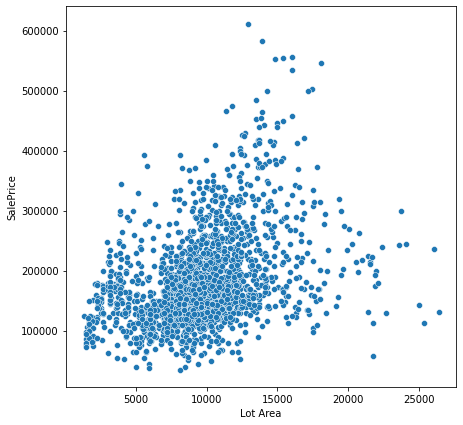

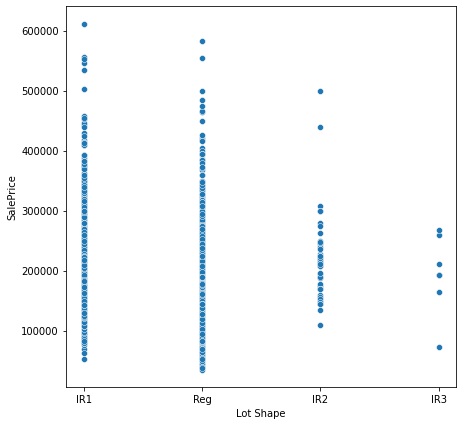

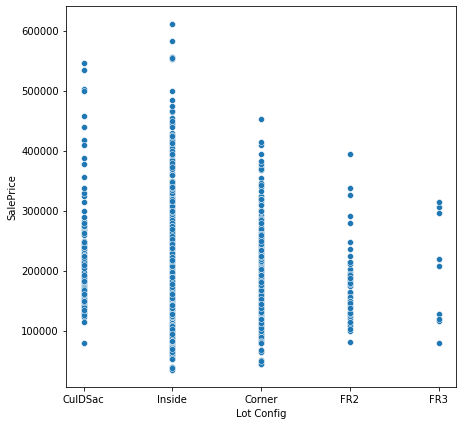

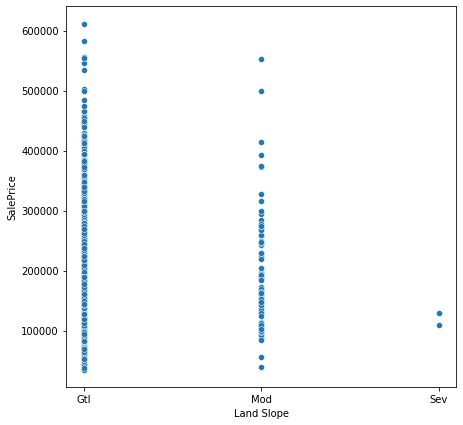

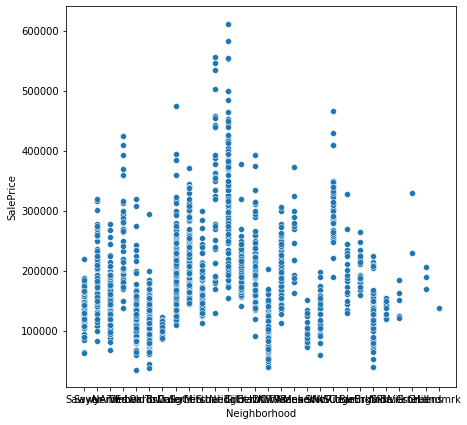

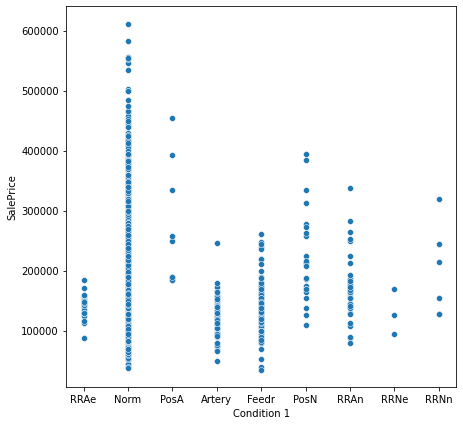

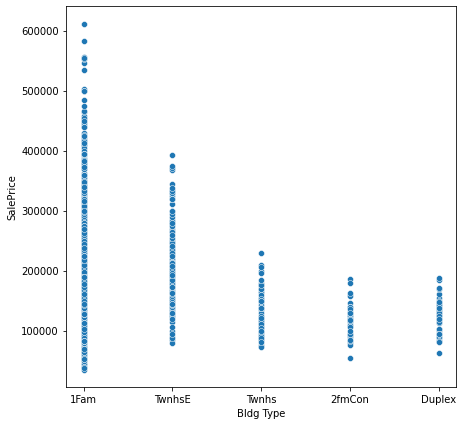

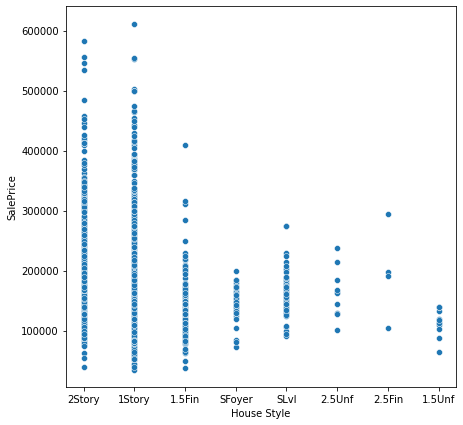

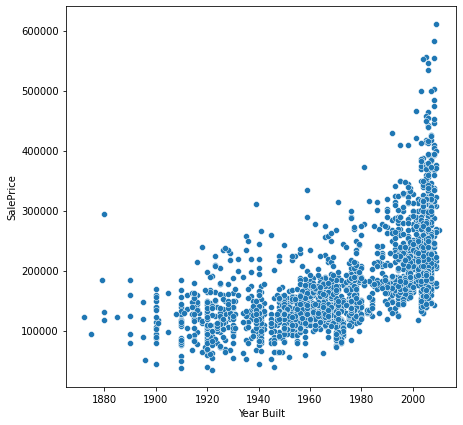

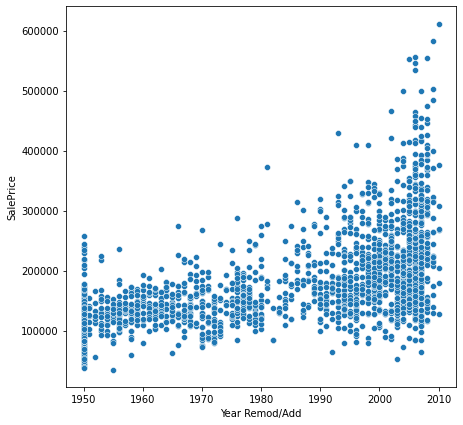

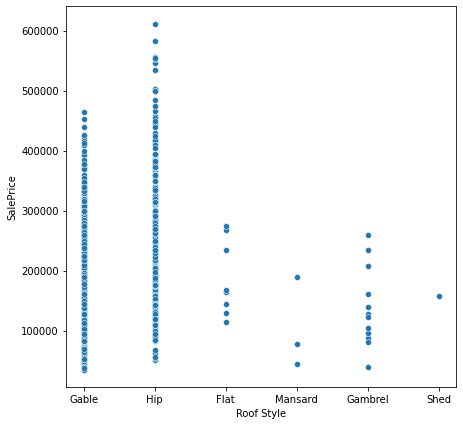

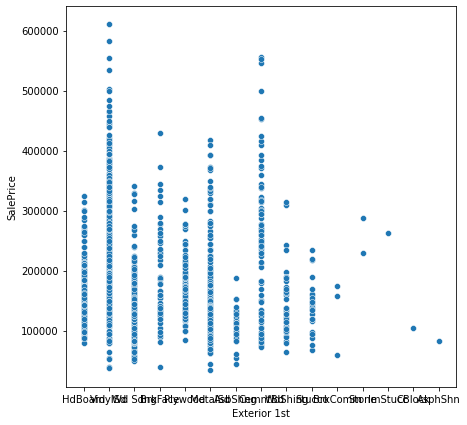

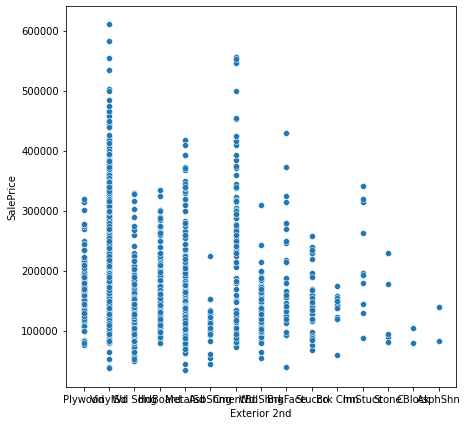

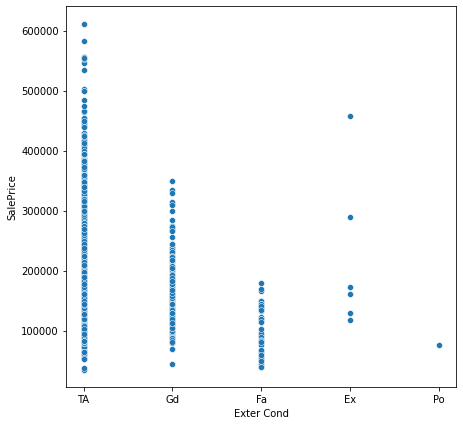

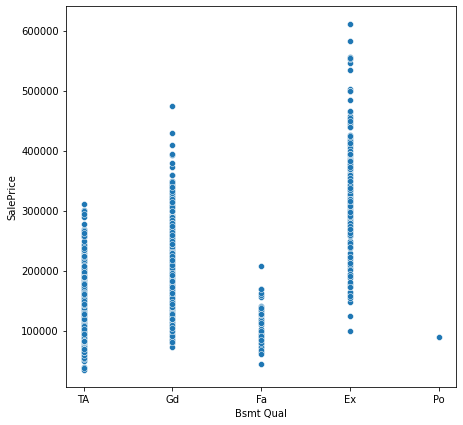

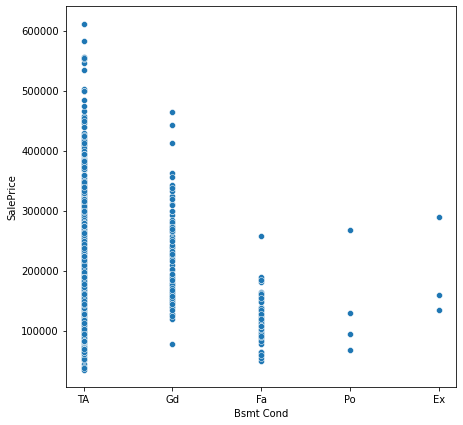

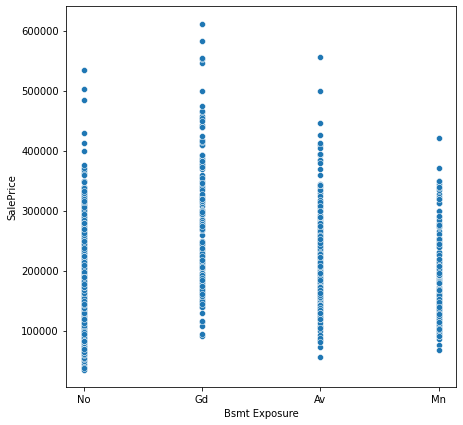

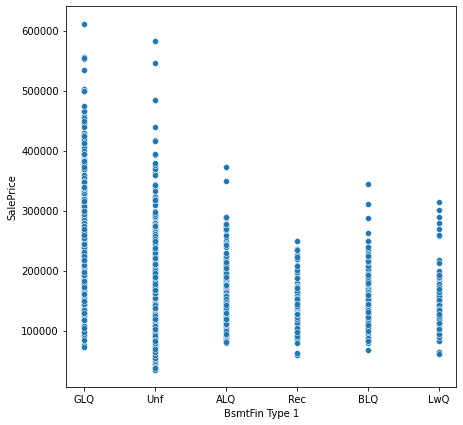

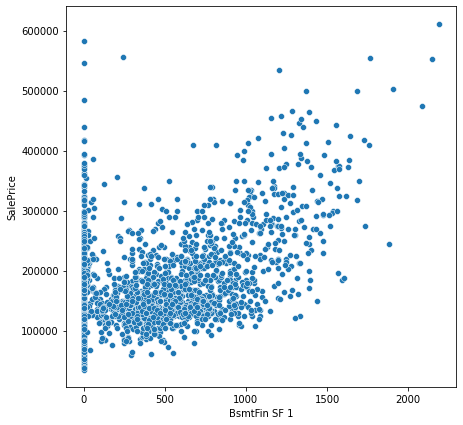

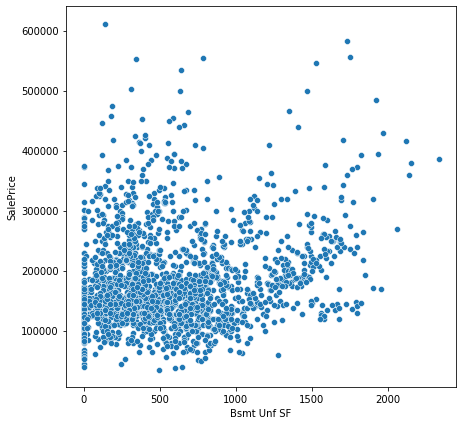

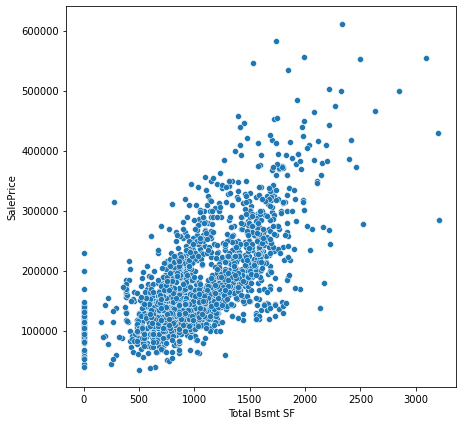

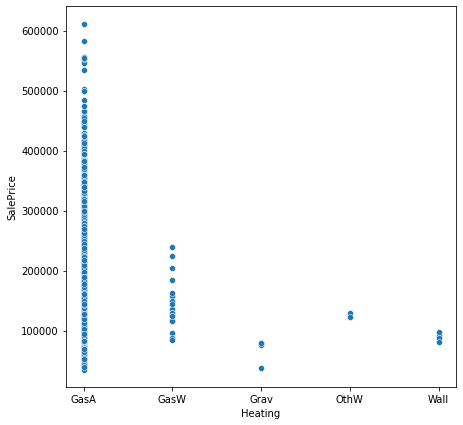

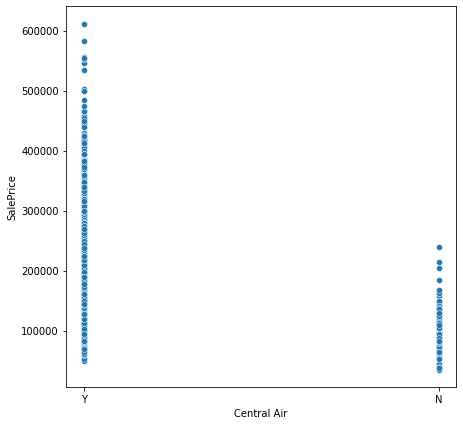

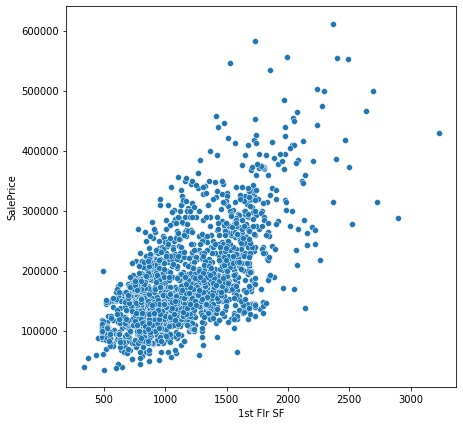

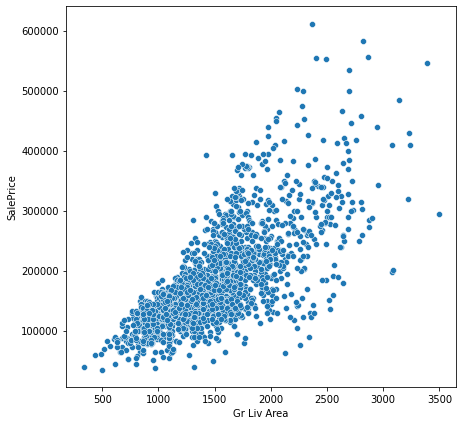

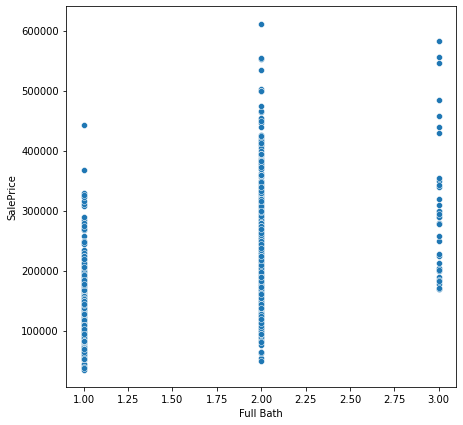

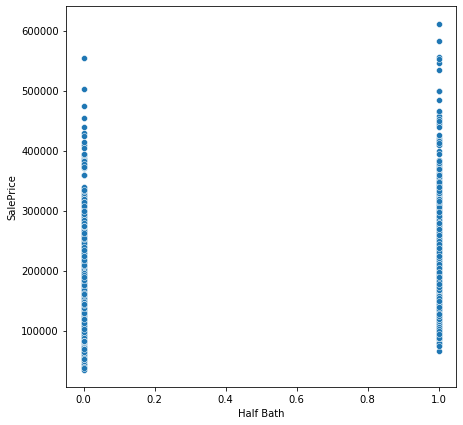

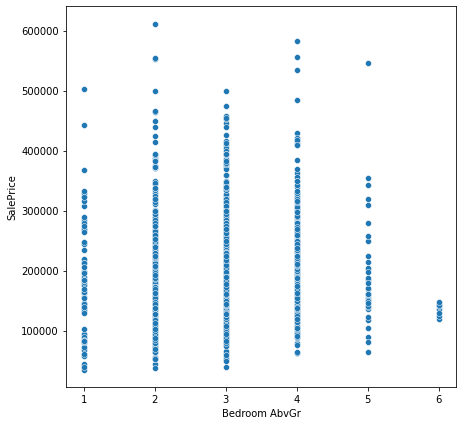

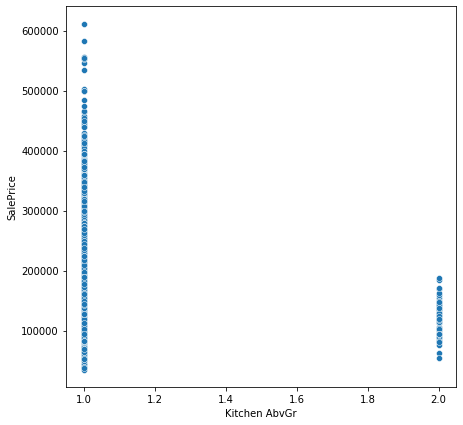

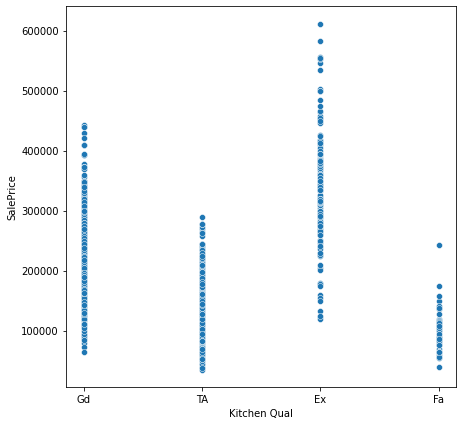

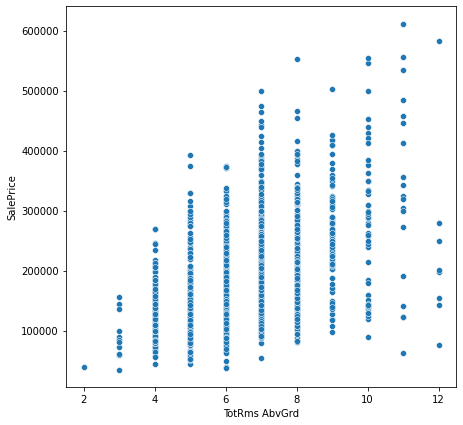

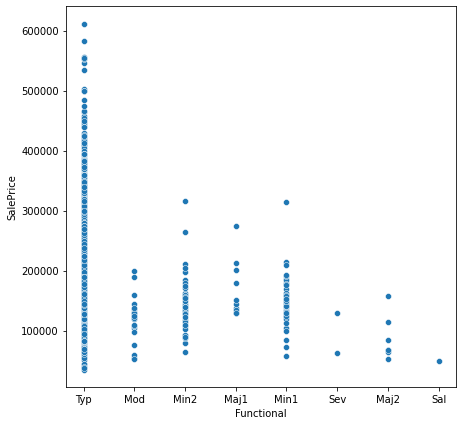

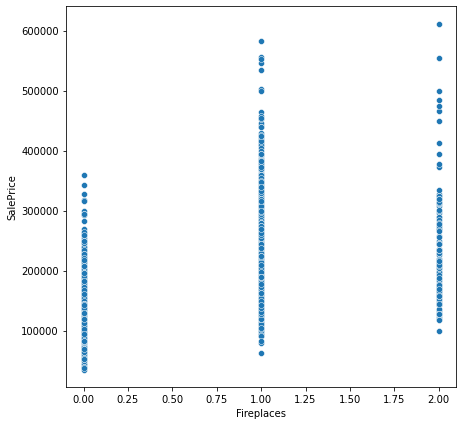

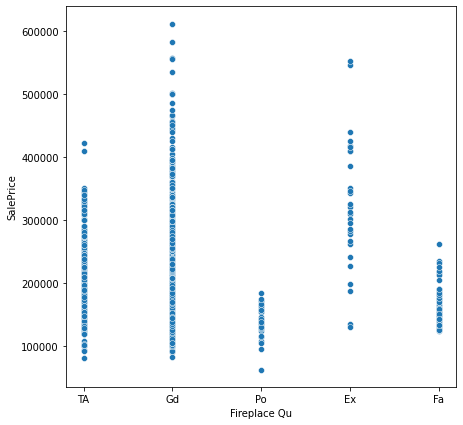

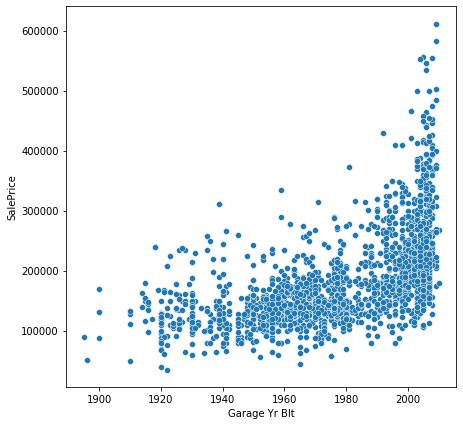

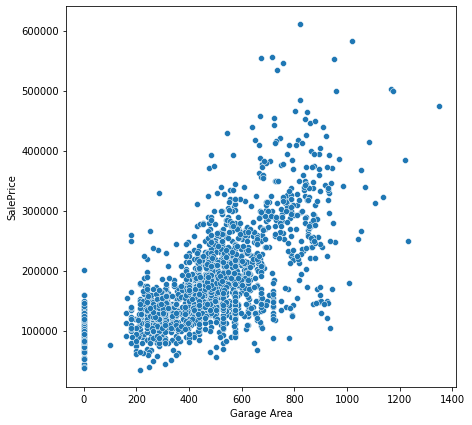

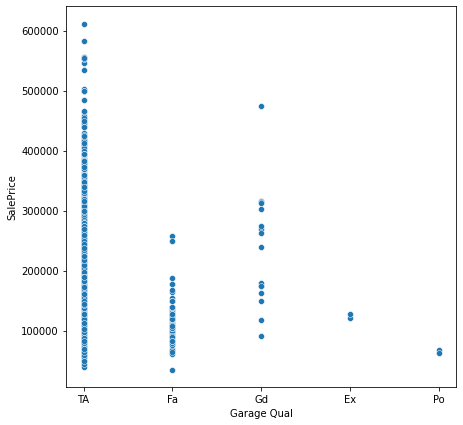

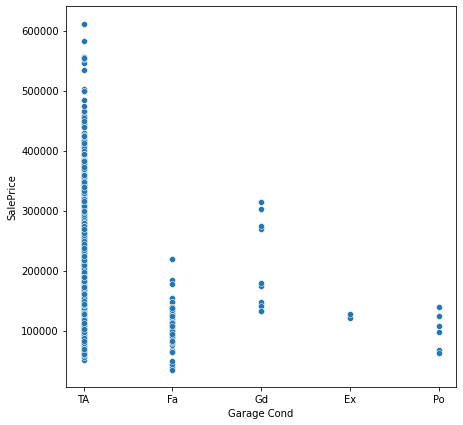

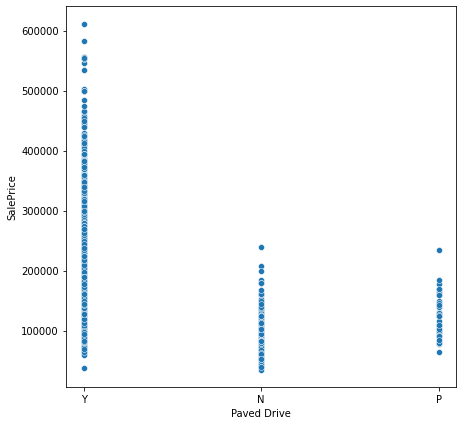

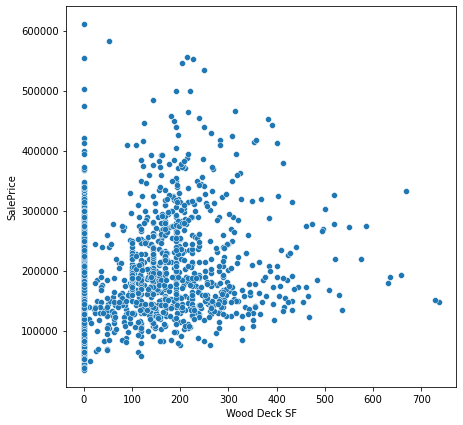

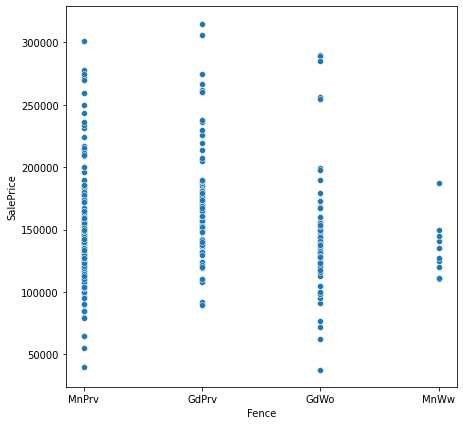

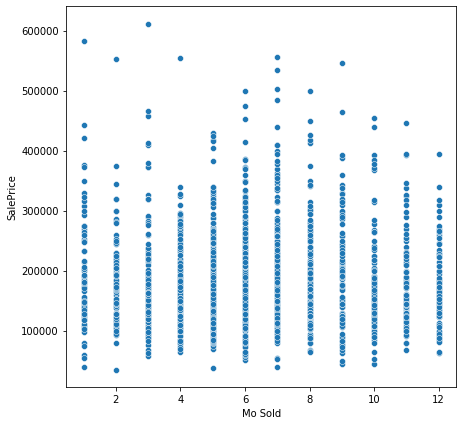

In [10]:
def scatter(columns):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data = train, x = columns, y = 'SalePrice')
    return plt.show()

# Lets just take a look at what we have
for names in train.columns:
    scatter(names)

In [11]:
# Lets Just check missing values real quick
train.isna().sum().sort_values(ascending = False)

Alley           1828
Fence           1580
Fireplace Qu     971
Lot Frontage     309
Garage Cond      103
                ... 
Foundation         0
Heating QC         0
Central Air        0
Electrical         0
SalePrice          0
Length: 63, dtype: int64

In [12]:
# Okay, lets get rid of some more values here that are NaN
# Lets just completely drop alley, fence, and fireplace

train.drop(['Alley','Fence','Fireplace Qu'], axis = 1, inplace = True)
test.drop(['Alley','Fence','Fireplace Qu'], axis = 1, inplace = True)
print(train.shape)
print(test.shape)

(1965, 60)
(878, 59)


In [13]:
# Lets see how many rows we will be left with if we just drop the rest of the Na's
train.dropna().shape

(1508, 60)

In [14]:
# Okay, we lost a good ammount of data, so lets just try dropping lot frontage as well
train.drop(['Lot Frontage'], axis = 1, inplace = True)
test.drop(['Lot Frontage'], axis = 1, inplace = True)

In [15]:
train.dropna(inplace=True)
print(train.shape)
train.head()

(1799, 59)


MS Zoning  Lot Area Lot Shape Land Contour Lot Config Land Slope  \
Id                                                                     
109        RL     13517       IR1          Lvl    CulDSac        Gtl   
544        RL     11492       IR1          Lvl    CulDSac        Gtl   
153        RL      7922       Reg          Lvl     Inside        Gtl   
318        RL      9802       Reg          Lvl     Inside        Gtl   
255        RL     14235       IR1          Lvl     Inside        Gtl   

    Neighborhood Condition 1 Bldg Type House Style  Overall Qual  \
Id                                                                 
109       Sawyer        RRAe      1Fam      2Story             6   
544      SawyerW        Norm      1Fam      2Story             7   
153        NAmes        Norm      1Fam      1Story             5   
318       Timber        Norm      1Fam      2Story             5   
255      SawyerW        Norm      1Fam      1.5Fin             6   

     Overall Cond  Year Built  Year Remod/Add Roof Style Exterior 1st  \
Id                                                                      
109             8        1976            2005      Gable      HdBoard   
544             5        1996            1997      Gable      VinylSd   
153             7        1953            2007      Gable      VinylSd   
318             5        2006            2007      Gable      VinylSd   
255             8        1900            1993      Gable      Wd Sdng   

    Exterior 2nd Mas Vnr Type Exter Qual Exter Cond Foundation Bsmt Qual  \
Id                                                                         
109      Plywood      BrkFace         Gd         TA     CBlock        TA   
544      VinylSd      BrkFace         Gd         TA      PConc        Gd   
153      VinylSd         None         TA         Gd     CBlock        TA   
318      VinylSd         None         TA         TA      PConc        Gd   
255      Plywood         None         TA         TA      PConc        Fa   

    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
Id                                                                        
109        TA            No            GLQ         533.0            Unf   
544        TA            No            GLQ         637.0            Unf   
153        TA            No            GLQ         731.0            Unf   
318        TA            No            Unf           0.0            Unf   
255        Gd            No            Unf           0.0            Unf   

     Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
Id                                                                          
109        192.0          725.0    GasA         Ex           Y      SBrkr   
544        276.0          913.0    GasA         Ex           Y      SBrkr   
153        326.0         1057.0    GasA         TA           Y      SBrkr   
318        384.0          384.0    GasA         Gd           Y      SBrkr   
255        676.0          676.0    GasA         TA           Y      SBrkr   

     1st Flr SF  2nd Flr SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
Id                                                                         
109         725         754         1479             0.0             0.0   
544         913        1209         2122             1.0             0.0   
153        1057           0         1057             1.0             0.0   
318         744         700         1444             0.0             0.0   
255         831         614         1445             0.0             0.0   

     Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  \
Id                                                                     
109          2          1              3              1           Gd   
544          2          1              4              1           Gd   
153          1          0              3              1           Gd   
318          2    

In [16]:
# I'm dropping Garage year built for right now becasue it a lot of mising information, but columns i think i would
# want to use, but not have to include the garage year blt
numeric_col = train._get_numeric_data().columns.drop(['SalePrice','Garage Yr Blt'])
X = train[numeric_col]
y = train['SalePrice']

kagg_X = test[numeric_col]

In [17]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14260)
cross_val_score(lr, X_train, y_train)

# okay, so the variance isn't that bad, but the r2 score itself isn't that great either

array([0.90540517, 0.84848814, 0.87229485, 0.87835987, 0.85899941])

### This function will just give me back the scores if I pass in X so i dont have to keep retyping like the last notebook 

In [18]:
# This will only return the mse, rse, and r2 score, as well as a cross val score with 5 
def scores_for_x(x):
    y = train['SalePrice']
    
    # set up a linear regression model first
    lr = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    
    
    # This is the baseline model
    y_train_baseline = [y_train.mean()]*len(y_train)
    y_test_baseline  = [y_train.mean()]*len(y_test)

    # this will be for the train baseline
    train_mse =  metrics.mean_squared_error(y_train, y_train_baseline)
    train_rmse = metrics.mean_squared_error(y_train, y_train_baseline, squared = False)
    
    # this will be for the test baseline 
    test_mse =  metrics.mean_squared_error(y_test, y_test_baseline)
    test_rmse =  metrics.mean_squared_error(y_test, y_test_baseline, squared = False)
    
    
    # Now we will actually fit our model in order to be able to get a 
    lr.fit(x_train, y_train)
    train_r2 = lr.score(x_train, y_train)
    test_r2 = lr.score(x_test, y_test)
    
    #predicting with our train model with the given X input
    y_hat = lr.predict(x_train)
    train1_mse = metrics.mean_squared_error(y_train, y_hat)
    train1_rmse = metrics.mean_squared_error(y_train, y_hat, squared= False)
    

    y_hat_test = lr.predict(x_test)
    test1_mse = metrics.mean_squared_error(y_test, y_hat_test)
    test1_rmse = metrics.mean_squared_error(y_test, y_hat_test, squared= False)

    
    # Time to actually print out the information(not returing because I'm just looking at the numbers, not saving them)
    
    #print(f'Train MSE Baseline : {train_mse}')
    print(f'Train RMSE Baseline: {train_rmse}\n')
    #print(f'Train MSE  : {train1_mse}')
    print(f'Train RMSE : {train1_rmse}')
    #print(f'\nTest MSE Baseline : {test_mse}')
    print(f'Test RMSE Baseline: {test_rmse}')

    print(f'Test RMSE : {test1_rmse}')
    print(f'\nTrain R2: {train_r2}')
    print(f'Test R2: {test_r2}')

# I can also print out the MSE, but for right now, lets just focus on the RMSE 

### Lets make a new poly with our new dataframe

In [19]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(data = X_poly, columns = poly.get_feature_names(numeric_col), index = X.index)
X_poly_df.head()

Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Id                                                                      
109   13517.0           6.0           8.0      1976.0          2005.0   
544   11492.0           7.0           5.0      1996.0          1997.0   
153    7922.0           5.0           7.0      1953.0          2007.0   
318    9802.0           5.0           5.0      2006.0          2007.0   
255   14235.0           6.0           8.0      1900.0          1993.0   

     BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
Id                                                                      
109         533.0        192.0          725.0       725.0       754.0   
544         637.0        276.0          913.0       913.0      1209.0   
153         731.0        326.0         1057.0      1057.0         0.0   
318           0.0        384.0          384.0       744.0       700.0   
255           0.0        676.0          676.0       831.0       614.0   

     Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
Id                                                                       
109       1479.0             0.0             0.0        2.0        1.0   
544       2122.0             1.0             0.0        2.0        1.0   
153       1057.0             1.0             0.0        1.0        0.0   
318       1444.0             0.0             0.0        2.0        1.0   
255       1445.0             0.0             0.0        2.0        0.0   

     Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Cars  \
Id                                                                          
109            3.0            1.0            6.0         0.0          2.0   
544            4.0            1.0            8.0         1.0          2.0   
153            3.0            1.0            5.0         0.0          1.0   
318            3.0            1.0            7.0         0.0          2.0   
255            3.0            1.0            6.0         0.0          2.0   

     Garage Area  Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold   Lot Area^2  \
Id                                                                             
109        475.0           0.0           44.0      3.0   2010.0  182709289.0   
544        559.0           0.0           74.0      4.0   2009.0  132066064.0   
153        246.0           0.0           52.0      1.0   2010.0   62758084.0   
318        400.0         100.0            0.0      4.0   2010.0   96079204.0   
255        484.0           0.0           59.0      3.0   2010.0  202635225.0   

     Lot Area Overall Qual  Lot Area Overall Cond  Lot Area Year Built  \
Id                                                                       
109                81102.0               108136.0           26709592.0   
544                80444.0                57460.0           22938032.0   
153                39610.0                55454.0           15471666.0   
318                49010.0                49010.0           19662812.0   
255                85410.0               113880.0           27046500.0   

     Lot Area Year Remod/Add  Lot Area BsmtFin SF 1  Lot Area Bsmt Unf SF  \
Id                                                                          
109               27101585.0              7204561.0             2595264.0   
544               22949524.0              7320404.0             3171792.0   
153               15899454.0              5790982.0             2582572.0   
318               19672614.0                    0.0             3763968.0   
255               28370355.0                    0.0             9622860.0   

     Lot Area Total Bsmt SF  Lot Area 1st Flr SF  Lot Area 2nd Flr SF  \
Id                                                                      
109               9799825.0            9799825.0           10191818.0   
544              10492196.0           10492196.0           13893828.0   
153       

In [20]:
kagg_poly = poly.fit_transform(kagg_X)
kagg_poly_df = pd.DataFrame(data = kagg_poly, columns = poly.get_feature_names(numeric_col), index = kagg_X.index)
kagg_poly_df.head()

Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Id                                                                       
2658    9142.0           6.0           8.0      1910.0          1950.0   
2718    9662.0           5.0           4.0      1977.0          1977.0   
2414   17104.0           7.0           5.0      2006.0          2006.0   
1989    8520.0           5.0           6.0      1923.0          2006.0   
625     9500.0           6.0           5.0      1963.0          1963.0   

      BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
Id                                                                       
2658           0.0       1020.0         1020.0       908.0      1020.0   
2718           0.0       1967.0         1967.0      1967.0         0.0   
2414         554.0        100.0          654.0       664.0       832.0   
1989           0.0        968.0          968.0       968.0         0.0   
625          609.0        785.0         1394.0      1394.0         0.0   

      Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
Id                                                                        
2658       1928.0             0.0             0.0        2.0        0.0   
2718       1967.0             0.0             0.0        2.0        0.0   
2414       1496.0             1.0             0.0        2.0        1.0   
1989        968.0             0.0             0.0        1.0        0.0   
625        1394.0             1.0             0.0        1.0        1.0   

      Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Cars  \
Id                                                                           
2658            4.0            2.0            9.0         0.0          1.0   
2718            6.0            2.0           10.0         0.0          2.0   
2414            3.0            1.0            7.0         1.0          2.0   
1989            2.0            1.0            5.0         0.0          2.0   
625             3.0            1.0            6.0         2.0          2.0   

      Garage Area  Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold   Lot Area^2  \
Id                                                                              
2658        440.0           0.0           60.0      4.0   2006.0   83576164.0   
2718        580.0         170.0            0.0      8.0   2006.0   93354244.0   
2414        426.0         100.0           24.0      9.0   2006.0  292546816.0   
1989        480.0           0.0            0.0      7.0   2007.0   72590400.0   
625         514.0           0.0           76.0      7.0   2009.0   90250000.0   

      Lot Area Overall Qual  Lot Area Overall Cond  Lot Area Year Built  \
Id                                                                        
2658                54852.0                73136.0           17461220.0   
2718                48310.0                38648.0           19101774.0   
2414               119728.0                85520.0           34310624.0   
1989                42600.0                51120.0           16383960.0   
625                 57000.0                47500.0           18648500.0   

      Lot Area Year Remod/Add  Lot Area BsmtFin SF 1  Lot Area Bsmt Unf SF  \
Id                                                                           
2658               17826900.0                    0.0             9324840.0   
2718               19101774.0                    0.0            19005154.0   
2414               34310624.0              9475616.0             1710400.0   
1989               17091120.0                    0.0             8247360.0   
625                18648500.0              5785500.0             7457500.0   

      Lot Area Total Bsmt SF  Lot Area 1st Flr SF  Lot Area 2nd Flr SF  \
Id                                                                       
2658               9324840.0            8300936.0            9324840.0   
2718              19005154.0    

In [21]:
# Lets get a baseline using the function we made
scores_for_x(X)

Train RMSE Baseline: 74351.56654625491

Train RMSE : 26225.035939883004
Test RMSE Baseline: 79977.0092331314
Test RMSE : 28811.387122909484

Train R2: 0.8755909603968115
Test R2: 0.869976383765547


In [22]:
# now lets check our poly
scores_for_x(X_poly_df)

Train RMSE Baseline: 77584.3614129277

Train RMSE : 16960.905700305946
Test RMSE Baseline: 70234.76793548731
Test RMSE : 35993.39158553716

Train R2: 0.9522086058900339
Test R2: 0.7347762433502213


### Best R2 score mean i've gotten so far, but this model is too Over fit, so lets try using the Ridge and Lasso <span id='test1'>

In [23]:
sc = StandardScaler()
y = train['SalePrice']
# Because we are using ridge and lasso, lets first standize our scores
X_poly_sc =  sc.fit_transform(X_poly_df)
kagg_poly_sc = sc.fit_transform(kagg_poly_df) # We will use this one later when predicting the ridge using all of X
# Lets do the split and train
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, random_state=14260)

sc1 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc1.transform(X_test)

In [24]:
# Lets check the ridge first
# make alphas
alpha = np.logspace(0, 3, 100)

ridge_cv = RidgeCV(alphas = alpha, cv = 6, scoring='r2')
ridge_cv.fit(X_train, y_train)
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))

# Ideal Alpha
ralpha = ridge_cv.alpha_
ralpha

0.9322820186538276
0.9093119528594633


37.64935806792467

> This is way better in terms of consistency and getting a better score

In [25]:
# Get our lasso going
lalpha = np.logspace(-3, 0, 150)

lasso_cv = LassoCV(alphas= lalpha, cv = 6, max_iter=6000, tol=0.05)
lasso_cv.fit(X_train, y_train)

print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))
print(lasso_cv.alpha_)

0.9040620908856905
0.8857488827170423
0.24887034759027854


In [26]:
# Lets see how many features Lasso decided to Zero out
sum(lasso_cv.coef_ == 0)

1

> Surprisingly, only one column got set to a coef of 0

### Looks like our ridge model is better so lets make one of those using the training model already made

In [27]:
ridge = Ridge(alpha = ralpha)

# Lets try this with our split train thing 
ridge.fit(X_train, y_train)
y_train_hat = ridge.predict(X_train)
y_test_hat = ridge.predict(X_test)

print(ridge.score(X_train, y_train))
print(metrics.mean_squared_error(y_train, y_train_hat, squared=False))
print()
print(ridge.score(X_test, y_test))
print(metrics.mean_squared_error(y_test, y_test_hat, squared=False))

0.9322820186538276
19442.70566733805

0.9093119528594633
23756.769386981603


### Lets try this with our whole X and y instead of the tests

In [28]:
alphar = np.logspace(0, 3, 100)
ridge_cv = RidgeCV(alphas = alphar, cv = 5, scoring = 'r2')
ridge_cv.fit(X_poly_sc, y)
print(ridge_cv.score(X_poly_sc, y))
ralpha = ridge_cv.alpha_

0.9300392350873076


> Fairly decent $R^2$ score now. Essentially saying that compared to a model with no predictors, we can account for the 93%  of the predictions with the score we have now. Saying that our model is having some good predictors now

In [29]:
ridge_model = Ridge(alpha=ralpha)
ridge_model.fit(X_poly_sc, y)
ridge_model.score(X_poly_sc, y)
y_hat_train = ridge_model.predict(X_poly_sc)

print(metrics.mean_squared_error(y, y_hat_train, squared=False))

20047.28747918636


> Fairly similar scores, but our model make with the training sets does a bit better so I think i'll stick with that one

In [30]:
kagg_hat = ridge_model.predict(kagg_poly_sc)
kagg_X['SalePrice'] = kagg_hat
output_1 = kagg_X[['SalePrice']]
output_1

C:\Users\16615\AppData\Local\Temp/ipykernel_7068/2044378586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kagg_X['SalePrice'] = kagg_hat


SalePrice
Id                 
2658  146060.750630
2718  158279.884348
2414  203059.834106
1989  112875.244493
625   178732.099736
...             ...
1662  202935.838249
1234  212045.982937
1373  131117.350536
1672  121549.780769
1939  119616.472879

[878 rows x 1 columns]

## Test 1 for Ridge 

``` python
output_1.to_csv('../datasets/Sub6.csv')
```

**RMSE:** *22,812.741* <span id='test1_score'>

In [31]:
output_1.to_csv('../datasets/Sub6_2.csv')

### I want to try using an Idea I got from Patrick of using Neighborhoods and Schools to see if it affects the model in any way <span id='schools'>

#### Lets start with making a dictionary of all the schools associated with each neighborhood 

In [32]:
# This is for public Elemntary schools only
# Found with google maps and https://www.ames.k12.ia.us/boundaries/
schools = {'NAmes' : 'Sawyer',
            'CollgCr' : 'Edwards/Jr_H',
            'OldTown' : 'Meeke',
            'NridgHt' : 'Fellows/HS',
            'Somerst' : 'Fellows/HS',
            'Gilbert' : 'Fellows/HS',
            'Sawyer' : 'Sawyer',
            'Edwards' : 'Edwards/Jr_H',
            'NWAmes' : 'Fellows/HS',
            'Mitchel' : 'Mitchell',
            'Crawfor' : 'Meeke',
            'SawyerW': 'Sawyer',
            'BrkSide': 'Meeke',
            'IDOTRR' : 'Not Sure',
            'Timber' : 'Mitchell',
            'NoRidge' : 'Fellows/HS',
            'StoneBr' : 'Fellows/HS',
            'SWISU' : 'Uni',
            'Blmngtn' : 'Fellows/HS',
            'BrDale' : 'Edwards/Jr_H',
            'ClearCr' : 'Sawyer',
            'MeadowV' : 'Mitchell',
            'NPkVill' : 'Not Sure',
            'Veenker' : 'Fellows/HS',
            'Blueste': 'Edwards/Jr_H',
            'Greens' : 'Mitchell',
            'Landmrk' : 'Not Sure',
            'GrnHill': 'Mitchell'}

In [33]:
# Add a column to show how which elemntary public schools affect house prices
train['School'] = train['Neighborhood'].map(schools)
train.head()

MS Zoning  Lot Area Lot Shape Land Contour Lot Config Land Slope  \
Id                                                                     
109        RL     13517       IR1          Lvl    CulDSac        Gtl   
544        RL     11492       IR1          Lvl    CulDSac        Gtl   
153        RL      7922       Reg          Lvl     Inside        Gtl   
318        RL      9802       Reg          Lvl     Inside        Gtl   
255        RL     14235       IR1          Lvl     Inside        Gtl   

    Neighborhood Condition 1 Bldg Type House Style  Overall Qual  \
Id                                                                 
109       Sawyer        RRAe      1Fam      2Story             6   
544      SawyerW        Norm      1Fam      2Story             7   
153        NAmes        Norm      1Fam      1Story             5   
318       Timber        Norm      1Fam      2Story             5   
255      SawyerW        Norm      1Fam      1.5Fin             6   

     Overall Cond  Year Built  Year Remod/Add Roof Style Exterior 1st  \
Id                                                                      
109             8        1976            2005      Gable      HdBoard   
544             5        1996            1997      Gable      VinylSd   
153             7        1953            2007      Gable      VinylSd   
318             5        2006            2007      Gable      VinylSd   
255             8        1900            1993      Gable      Wd Sdng   

    Exterior 2nd Mas Vnr Type Exter Qual Exter Cond Foundation Bsmt Qual  \
Id                                                                         
109      Plywood      BrkFace         Gd         TA     CBlock        TA   
544      VinylSd      BrkFace         Gd         TA      PConc        Gd   
153      VinylSd         None         TA         Gd     CBlock        TA   
318      VinylSd         None         TA         TA      PConc        Gd   
255      Plywood         None         TA         TA      PConc        Fa   

    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
Id                                                                        
109        TA            No            GLQ         533.0            Unf   
544        TA            No            GLQ         637.0            Unf   
153        TA            No            GLQ         731.0            Unf   
318        TA            No            Unf           0.0            Unf   
255        Gd            No            Unf           0.0            Unf   

     Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
Id                                                                          
109        192.0          725.0    GasA         Ex           Y      SBrkr   
544        276.0          913.0    GasA         Ex           Y      SBrkr   
153        326.0         1057.0    GasA         TA           Y      SBrkr   
318        384.0          384.0    GasA         Gd           Y      SBrkr   
255        676.0          676.0    GasA         TA           Y      SBrkr   

     1st Flr SF  2nd Flr SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
Id                                                                         
109         725         754         1479             0.0             0.0   
544         913        1209         2122             1.0             0.0   
153        1057           0         1057             1.0             0.0   
318         744         700         1444             0.0             0.0   
255         831         614         1445             0.0             0.0   

     Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  \
Id                                                                     
109          2          1              3              1           Gd   
544          2          1              4              1           Gd   
153          1          0              3              1           Gd   
318          2    

In [34]:
# Same for the test set
test['School'] = test['Neighborhood'].map(schools)
test.head()

MS Zoning  Lot Area Lot Shape Land Contour Lot Config Land Slope  \
Id                                                                      
2658        RM      9142       Reg          Lvl     Inside        Gtl   
2718        RL      9662       IR1          Lvl     Inside        Gtl   
2414        RL     17104       IR1          Lvl     Inside        Gtl   
1989        RM      8520       Reg          Lvl     Inside        Gtl   
625         RL      9500       IR1          Lvl     Inside        Gtl   

     Neighborhood Condition 1 Bldg Type House Style  Overall Qual  \
Id                                                                  
2658      OldTown        Norm    2fmCon      2Story             6   
2718       Sawyer        Norm    Duplex      1Story             5   
2414      Gilbert        Norm      1Fam      2Story             7   
1989      OldTown        Norm      1Fam      1Story             5   
625         NAmes        Norm      1Fam      1Story             6   

      Overall Cond  Year Built  Year Remod/Add Roof Style Exterior 1st  \
Id                                                                       
2658             8        1910            1950      Gable      AsbShng   
2718             4        1977            1977      Gable      Plywood   
2414             5        2006            2006      Gable      VinylSd   
1989             6        1923            2006      Gable      Wd Sdng   
625              5        1963            1963      Gable      Plywood   

     Exterior 2nd Mas Vnr Type Exter Qual Exter Cond Foundation Bsmt Qual  \
Id                                                                          
2658      AsbShng         None         TA         Fa      Stone        Fa   
2718      Plywood         None         TA         TA     CBlock        Gd   
2414      VinylSd         None         Gd         TA      PConc        Gd   
1989      Wd Sdng         None         Gd         TA     CBlock        TA   
625       Plywood      BrkFace         TA         TA     CBlock        Gd   

     Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
Id                                                                         
2658        TA            No            Unf             0            Unf   
2718        TA            No            Unf             0            Unf   
2414        Gd            Av            GLQ           554            Unf   
1989        TA            No            Unf             0            Unf   
625         TA            No            BLQ           609            Unf   

      Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
Id                                                                           
2658         1020           1020    GasA         Gd           N      FuseP   
2718         1967           1967    GasA         TA           Y      SBrkr   
2414          100            654    GasA         Ex           Y      SBrkr   
1989          968            968    GasA         TA           Y      SBrkr   
625           785           1394    GasA         Gd           Y      SBrkr   

      1st Flr SF  2nd Flr SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
Id                                                                          
2658         908        1020         1928               0               0   
2718        1967           0         1967               0               0   
2414         664         832         1496               1               0   
1989         968           0          968               0               0   
625         1394           0         1394               1               0   

      Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  \
Id                                                                      
2658          2          0              4              2           Fa   
2718          2          0              6              2           TA   
2414          2          1            

In [35]:
# This function will just return a Ridge score for X along with the RMSE for easier use 
def ridge_it(X):
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # scale it
    sc = StandardScaler()
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)

    r = RidgeCV(alphas = np.logspace(0,3, 100), cv = 6, scoring = 'r2')
    r.fit(Z_train, y_train)

    print(f'Train Score: {r.score(Z_train, y_train)}')
    print(f'Test Score: {r.score(Z_test, y_test)}')

    print(f'\n Train RMSE: {metrics.mean_squared_error(y_train, r.predict(Z_train), squared= False)}')
    print(f'Train RMSE: {metrics.mean_squared_error(y_test, r.predict(Z_test), squared=False)}')

In [36]:
# Lets just test it first using our X_poly_df
ridge_it(X_poly_df)

Train Score: 0.9287186789108417
Test Score: 0.9198447095999542

 Train RMSE: 19844.717052914963
Train RMSE: 22613.619236475166


## In order to see if Schools actually help, lets run the exact same test as Test 1, but this time only add a dummy column of the schools before adding any other categorical columns <span id='test2'>

## Lets first join the school column to the X_poly_df

In [37]:
X_mix = X_poly_df.join(train['School'])
X_mix = pd.get_dummies(data=X_mix, columns=['School'])

# making my drop column 'Not Sure' because those were more like landmarks so i wasent sure which school it would be
X_mix.drop('School_Not Sure', axis = 1, inplace = True)
X_mix

Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Id                                                                       
109    13517.0           6.0           8.0      1976.0          2005.0   
544    11492.0           7.0           5.0      1996.0          1997.0   
153     7922.0           5.0           7.0      1953.0          2007.0   
318     9802.0           5.0           5.0      2006.0          2007.0   
255    14235.0           6.0           8.0      1900.0          1993.0   
...        ...           ...           ...         ...             ...   
1587   11449.0           8.0           5.0      2007.0          2007.0   
785    12342.0           4.0           5.0      1940.0          1950.0   
916     7558.0           6.0           6.0      1928.0          1950.0   
639    10400.0           4.0           5.0      1956.0          1956.0   
10      7500.0           7.0           5.0      1999.0          1999.0   

      BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
Id                                                                       
109          533.0        192.0          725.0       725.0       754.0   
544          637.0        276.0          913.0       913.0      1209.0   
153          731.0        326.0         1057.0      1057.0         0.0   
318            0.0        384.0          384.0       744.0       700.0   
255            0.0        676.0          676.0       831.0       614.0   
...            ...          ...            ...         ...         ...   
1587        1011.0        873.0         1884.0      1728.0         0.0   
785          262.0        599.0          861.0       861.0         0.0   
916            0.0        896.0          896.0      1172.0       741.0   
639          155.0        295.0         1200.0      1200.0         0.0   
10             0.0        994.0          994.0      1028.0       776.0   

      Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
Id                                                                        
109        1479.0             0.0             0.0        2.0        1.0   
544        2122.0             1.0             0.0        2.0        1.0   
153        1057.0             1.0             0.0        1.0        0.0   
318        1444.0             0.0             0.0        2.0        1.0   
255        1445.0             0.0             0.0        2.0        0.0   
...           ...             ...             ...        ...        ...   
1587       1728.0             1.0             0.0        2.0        0.0   
785         861.0             0.0             0.0        1.0        0.0   
916        1913.0             0.0             0.0        1.0        1.0   
639        1200.0             1.0             0.0        1.0        0.0   
10         1804.0             0.0             0.0        2.0        1.0   

      Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Cars  \
Id                                                                           
109             3.0            1.0            6.0         0.0          2.0   
544             4.0            1.0            8.0         1.0          2.0   
153             3.0            1.0            5.0         0.0          1.0   
318             3.0            1.0            7.0         0.0          2.0   
255             3.0            1.0            6.0         0.0          2.0   
...             ...            ...            ...         ...          ...   
1587            3.0            1.0            7.0         1.0          2.0   
785             1.0            1.0            4.0         0.0          2.0   
916             3.0            1.0            9.0         1.0          2.0   
639             3.0            1.0            6.0         2.0          1.0   
10              3.0            1.0            7.0         1.0          2.0   

      Garage Area  Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold   Lot Area^2  \
Id      

In [38]:
Kagg_mix = kagg_poly_df.join(test['School'])
Kagg_mix = pd.get_dummies(data=Kagg_mix, columns=['School'])

# making my drop column 'Not Sure' because those were more like landmarks so i wasent sure which school it would be
Kagg_mix.drop('School_Not Sure', axis = 1, inplace = True)
Kagg_mix

Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Id                                                                       
2658    9142.0           6.0           8.0      1910.0          1950.0   
2718    9662.0           5.0           4.0      1977.0          1977.0   
2414   17104.0           7.0           5.0      2006.0          2006.0   
1989    8520.0           5.0           6.0      1923.0          2006.0   
625     9500.0           6.0           5.0      1963.0          1963.0   
...        ...           ...           ...         ...             ...   
1662    8000.0           6.0           6.0      1974.0          1974.0   
1234   14670.0           6.0           7.0      1966.0          1999.0   
1373    8250.0           5.0           5.0      1968.0          1968.0   
1672    9000.0           4.0           6.0      1971.0          1971.0   
1939    8400.0           5.0           5.0      1955.0          1955.0   

      BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
Id                                                                       
2658           0.0       1020.0         1020.0       908.0      1020.0   
2718           0.0       1967.0         1967.0      1967.0         0.0   
2414         554.0        100.0          654.0       664.0       832.0   
1989           0.0        968.0          968.0       968.0         0.0   
625          609.0        785.0         1394.0      1394.0         0.0   
...            ...          ...            ...         ...         ...   
1662         931.0          0.0         1084.0      1084.0       793.0   
1234         575.0        529.0         1104.0      1104.0       884.0   
1373         250.0        210.0          952.0      1211.0         0.0   
1672         616.0        248.0          864.0       864.0         0.0   
1939         793.0        130.0          923.0       925.0         0.0   

      Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
Id                                                                        
2658       1928.0             0.0             0.0        2.0        0.0   
2718       1967.0             0.0             0.0        2.0        0.0   
2414       1496.0             1.0             0.0        2.0        1.0   
1989        968.0             0.0             0.0        1.0        0.0   
625        1394.0             1.0             0.0        1.0        1.0   
...           ...             ...             ...        ...        ...   
1662       1877.0             1.0             0.0        2.0        1.0   
1234       1988.0             0.0             0.0        2.0        1.0   
1373       1211.0             0.0             0.0        1.0        0.0   
1672        864.0             0.0             0.0        1.0        0.0   
1939        925.0             1.0             0.0        1.0        0.0   

      Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Cars  \
Id                                                                           
2658            4.0            2.0            9.0         0.0          1.0   
2718            6.0            2.0           10.0         0.0          2.0   
2414            3.0            1.0            7.0         1.0          2.0   
1989            2.0            1.0            5.0         0.0          2.0   
625             3.0            1.0            6.0         2.0          2.0   
...             ...            ...            ...         ...          ...   
1662            4.0            1.0            8.0         1.0          2.0   
1234            4.0            1.0            9.0         1.0          2.0   
1373            3.0            1.0            5.0         1.0          1.0   
1672            3.0            1.0            5.0         0.0          2.0   
1939            3.0            1.0            5.0         2.0          1.0   

      Garage Area  Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold   Lot Area^2  \
Id      

### Lets just run our ridge it test here and make sure we didn't break anything before trying to get down into it

In [39]:
ridge_it(X_mix)

Train Score: 0.9322786626947057
Test Score: 0.9143376195098045

 Train RMSE: 19934.510940849275
Train RMSE: 21455.899627767532


> Nice the scores do in fact look a bit better so lets try running a whole model and see what our unseen data (kaggle) will give us

In [40]:
sc = StandardScaler()
X_mix_sc =  sc.fit_transform(X_mix)
kagg_mix_sc = sc.fit_transform(Kagg_mix)

In [41]:
ridge_2 = RidgeCV(alphas = np.logspace(0,3,155), cv = 5)
ridge_2.fit(X_mix_sc, y)

print(f'X R2 Score: {ridge_2.score(X_mix_sc, y)}')
print(f'X RMSE: {metrics.mean_squared_error(y, ridge_2.predict(X_mix_sc), squared = False)}')
ridge_2.alpha_

X R2 Score: 0.9324415714299288
X RMSE: 19700.085599730122


41.38882687039298

> Similar test score to before, but lets see how our kaggle works

In [42]:
Kagg_mix['SalePrice'] = ridge_2.predict(kagg_mix_sc)
output_2 = Kagg_mix[['SalePrice']]
output_2

SalePrice
Id                 
2658  147008.020576
2718  162209.542779
2414  206490.571951
1989  115578.184089
625   177786.769930
...             ...
1662  205609.876418
1234  209140.593300
1373  131861.867564
1672  123563.104225
1939  120135.048137

[878 rows x 1 columns]

## Test 2 Score was just slightly better then my best score so far, which was test 1
``` python
output_2.to_csv('../datasets/Sub7.csv')
```

**RMSE Score:**  *22,417.390* <span id='test2_score'>

In [43]:
Kagg_mix.drop('SalePrice', axis = 1, inplace = True)

## More Cleaning <span id='more_cleaning'>

In [44]:
# Lets just get another corr map
corr = train._get_numeric_data().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(5, 12))
sns.heatmap(corr[['SalePrice']].sort_values(by = 'SalePrice', ascending= False),
           annot = True,
           cmap = 'Pastel2')

<AxesSubplot:>

In [45]:
X_mix.insert(0, 'Coef', 1)
X_mix_stats = sm.OLS(endog = y, exog = X_mix).fit()
X_mix_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     75.03
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:29:13   Log-Likelihood:                -20126.
No. Observations:                1799   AIC:                         4.094e+04
Df Residuals:                    1453   BIC:                         4.285e+04
Df Model:                         345                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Coef                          -1.605e+09   9.99e+08     -1.608      0.108   -3.56e+09    3.53e+08
Lot Area                       -108.2538    269.418     -0.402      0.688    -636.743     420.235
Overall Qual                   6.348e+05   1.04e+06      0.608      0.543   -1.41e+06    2.68e+06
Overall Cond                   -5.76e+04   1.05e+06     -0.055      0.956   -2.11e+06    1.99e+06
Year Built                     4.243e+04   5.83e+04      0.727      0.467    -7.2e+04    1.57e+05
Year Remod/Add                -1.494e+04   6.62e+04     -0.226      0.821   -1.45e+05    1.15e+05
BsmtFin SF 1                  -7080.1525   5637.658     -1.256      0.209   -1.81e+04    3978.666
Bsmt Unf SF                   -8965.7788   5911.856     -1.517      0.130   -2.06e+04    2630.907
Total Bsmt SF                  5792.4347   8090.054      0.716      0.474   -1.01e+04    2.17e+04
1st Flr SF                     4925.2602   4076.717      1.208      0.227   -3071.619    1.29e+04
2nd Flr SF                     1503.4397   3050.560      0.493      0.622   -4480.532    7487.411
Gr Liv Area                    6449.4203   3344.764      1.928      0.054    -111.662     1.3e+04
Bsmt Full Bath                -3.519e+06   2.36e+06     -1.492      0.136   -8.15e+06    1.11e+06
Bsmt Half Bath                 9.225e+05   1.24e+06      0.745      0.456   -1.51e+06    3.35e+06
Full Bath                     -5.923e+06   2.69e+06     -2.199      0.028   -1.12e+07    -6.4e+05
Half Bath                     -2.146e+05    8.8e+05     -0.244      0.807   -1.94e+06    1.51e+06
Bedroom AbvGr                 -1.591e+06   1.63e+06     -0.976      0.329   -4.79e+06    1.61e+06
Kitchen AbvGr                 -9.886e+08   6.15e+08     -1.607      0.108    -2.2e+09    2.18e+08
TotRms AbvGrd                 -6.338e+05   1.17e+06     -0.543      0.587   -2.92e+06    1.66e+06
Fireplaces                     9.077e+05   1.57e+06      0.578      0.564   -2.17e+06    3.99e+06
Garage Cars                   -2.457e+06   2.82e+06     -0.872      0.384   -7.99e+06    3.07e+06
Garage Area                    -525.0121   9361.730     -0.056      0.955   -1.89e+04    1.78e+04
Wood Deck SF                   1.266e+04   6891.559      1.837      0.066    -856.472    2.62e+04
Open Porch SF                 -2.359e+04   1.58e+04     -1.495      0.135   -5.45e+04    7352.481
Mo Sold                         7.36e+05   3.25e+05      2.262      0.024    9.78e+04    1.37e+06
Yr Sold                        2.231e+06    1.4e+06      1.594      0.111   -5.15e+05    4.98e+06
Lot Area^2                    -8.881e-05   3.46e-05     -2.570      0.010      -0.000    -2.1e-05
Lot Area Overall Qual            -0.3417      0.243     -1.408      0.159      -0.818       0.134
Lot Area Overall Cond             0.3296     

In [46]:
stats_df = pd.DataFrame({'Coef' : X_mix_stats.params,
                           'P Values' : X_mix_stats.pvalues})
stats_df.drop('Coef', inplace = True)
stats_df

Coef  P Values
Lot Area             -108.253814  0.687885
Overall Qual       634816.358667  0.543274
Overall Cond       -57601.186912  0.956103
Year Built          42427.016523  0.467081
Year Remod/Add     -14935.900898  0.821432
...                          ...       ...
School_Fellows/HS    3931.016425  0.271219
School_Meeke         9054.334128  0.006658
School_Mitchell       157.482826  0.968088
School_Sawyer        2282.633536  0.506404
School_Uni           5868.107302  0.282713

[356 rows x 2 columns]

In [47]:
categorical_columns = list(set(train.columns) - set(train._get_numeric_data().columns))
categorical_columns

['Exterior 2nd',
 'Garage Qual',
 'Bldg Type',
 'Garage Cond',
 'Functional',
 'Land Slope',
 'Garage Type',
 'BsmtFin Type 2',
 'Condition 1',
 'Garage Finish',
 'Exterior 1st',
 'Land Contour',
 'Central Air',
 'Neighborhood',
 'MS Zoning',
 'House Style',
 'Bsmt Exposure',
 'Bsmt Qual',
 'Exter Qual',
 'Paved Drive',
 'BsmtFin Type 1',
 'Foundation',
 'Roof Style',
 'Electrical',
 'Exter Cond',
 'School',
 'Mas Vnr Type',
 'Lot Config',
 'Bsmt Cond',
 'Kitchen Qual',
 'Lot Shape',
 'Heating',
 'Heating QC']

In [48]:
# Lets just start with cat plots first
def stripplot(columns):
    plt.figure(figsize =(7,7))
    sns.stripplot( data = train, x = train[columns], y = train['SalePrice'], alpha = 0.45)
    return plt.show()

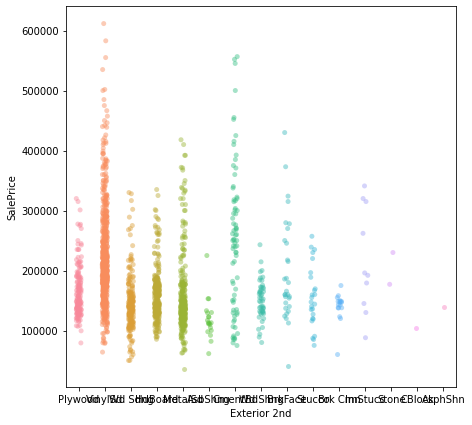

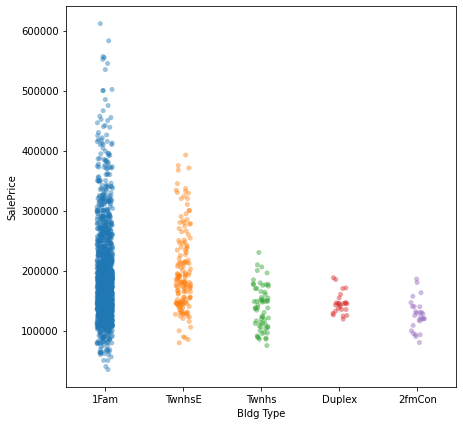

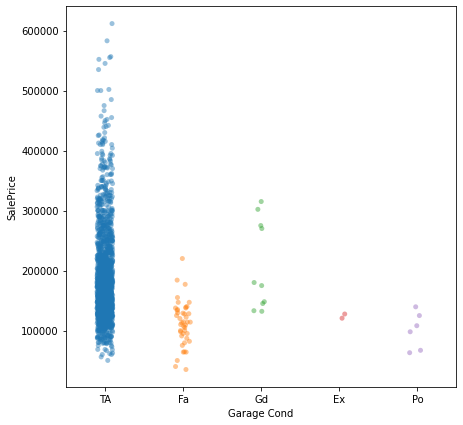

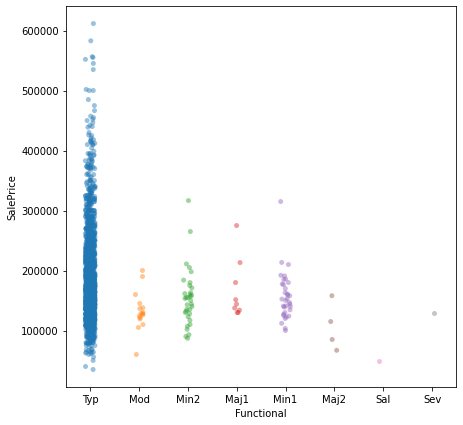

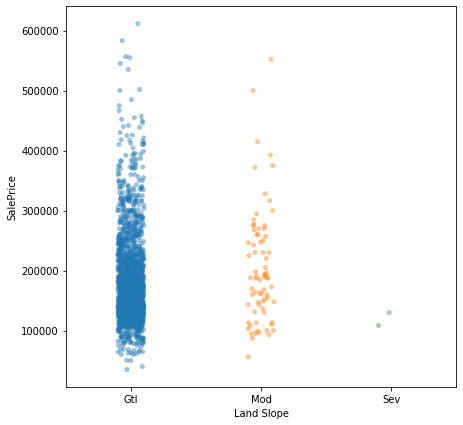

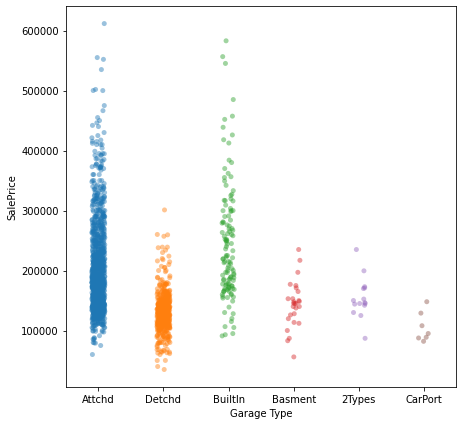

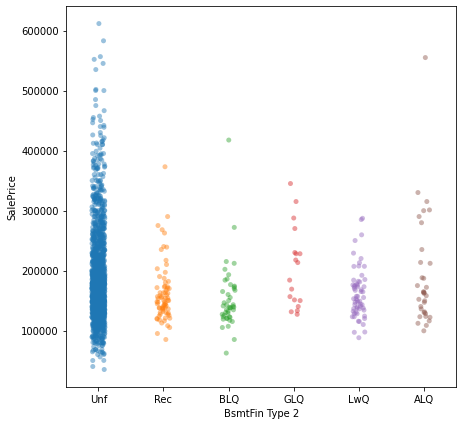

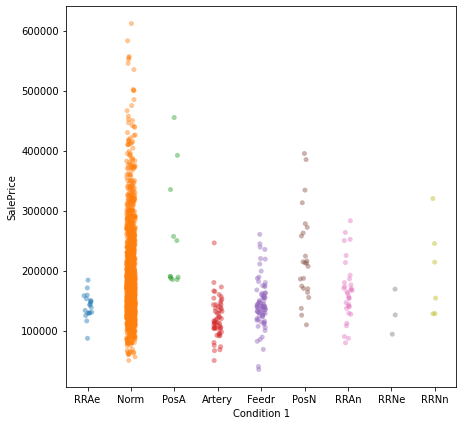

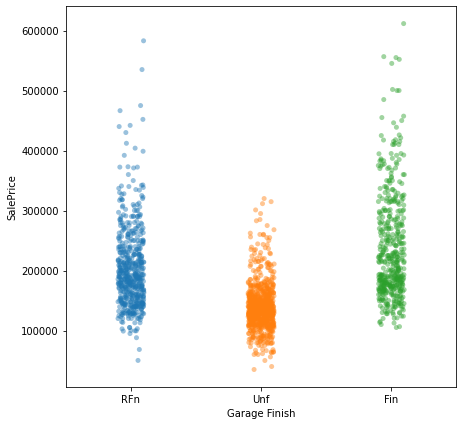

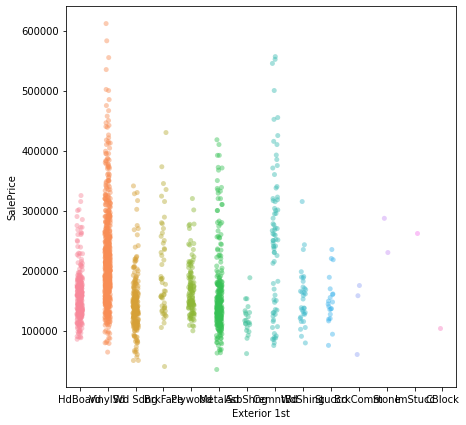

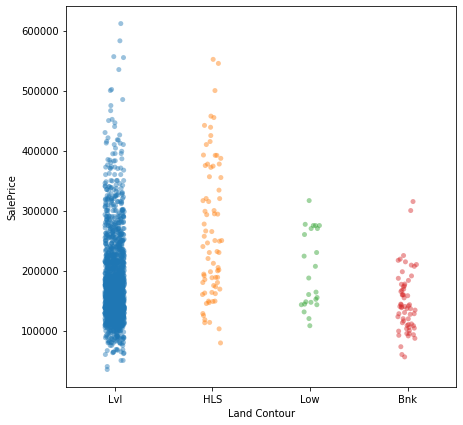

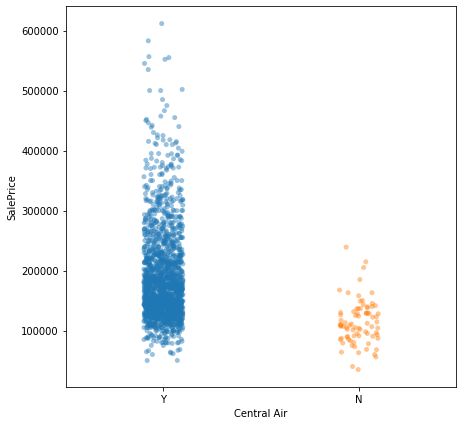

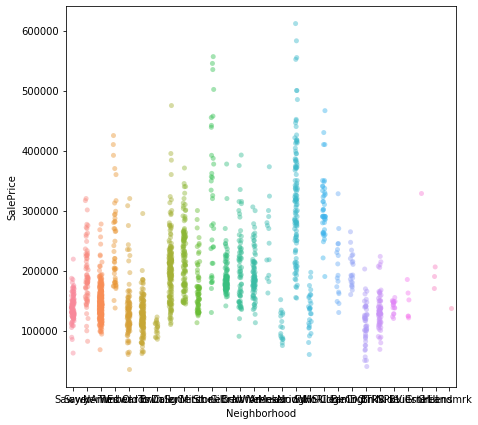

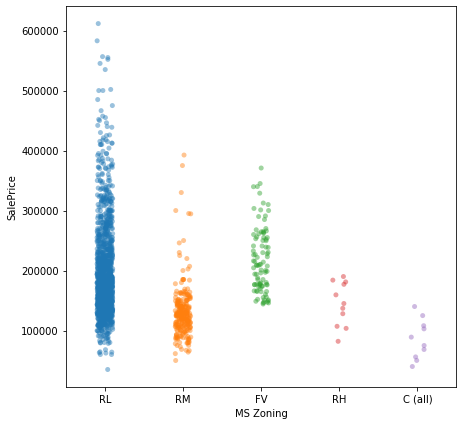

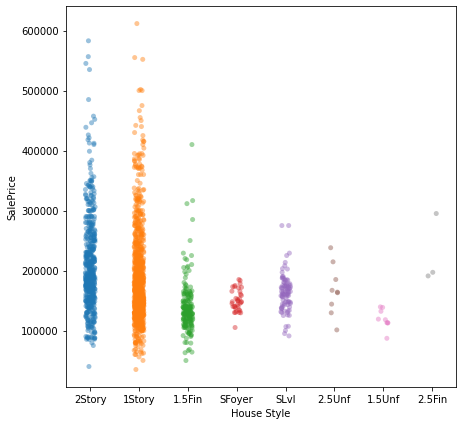

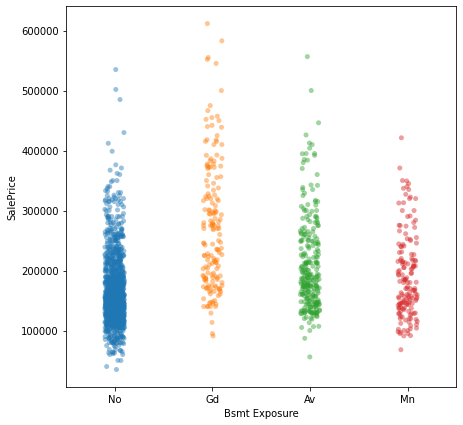

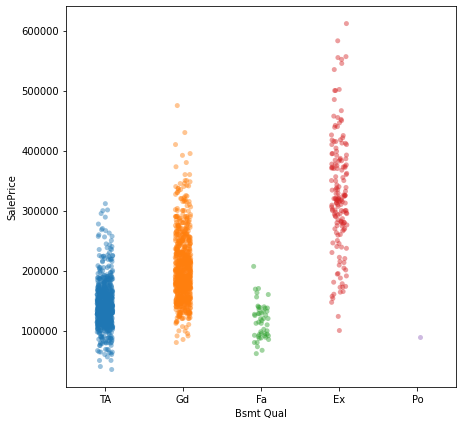

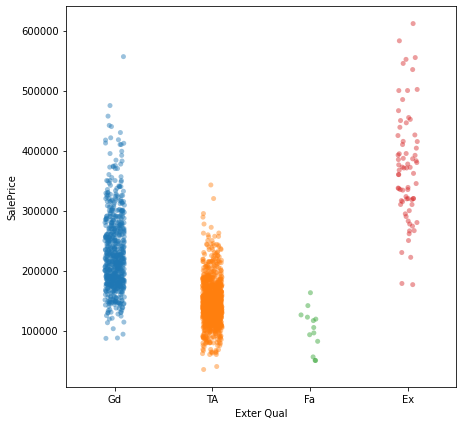

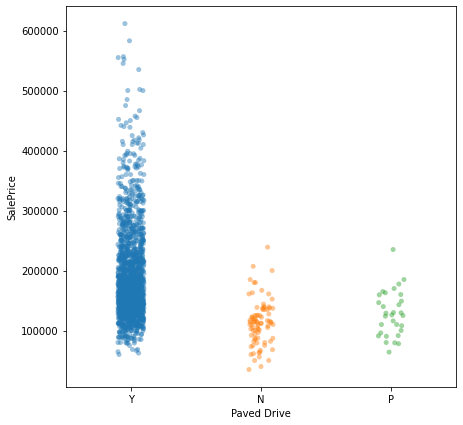

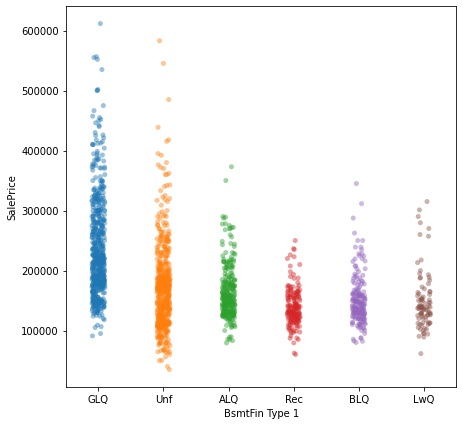

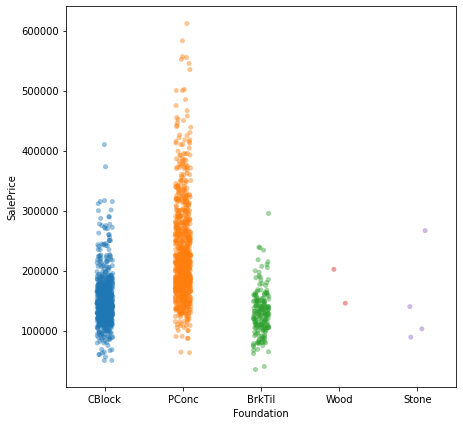

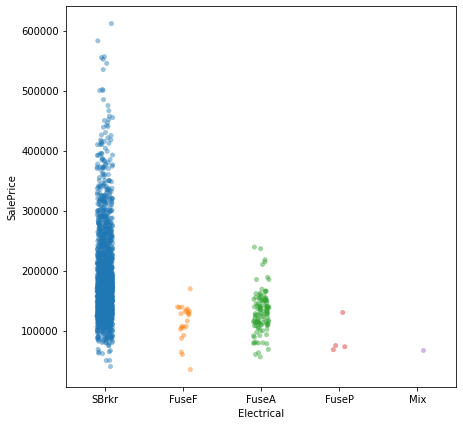

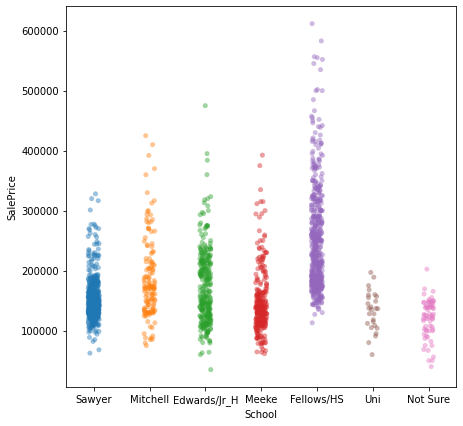

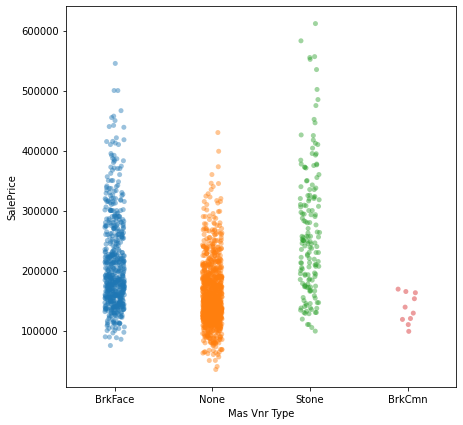

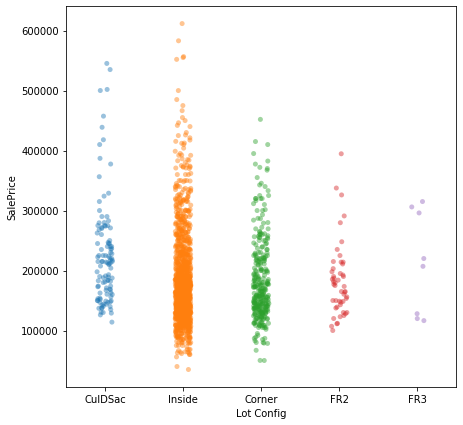

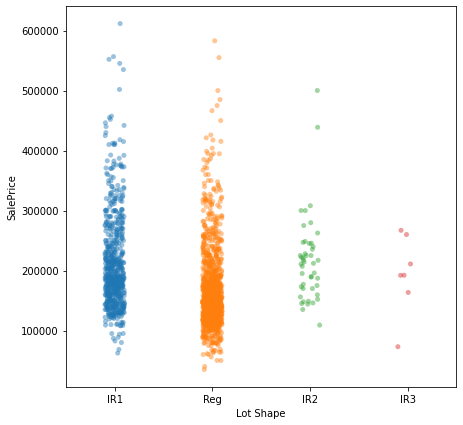

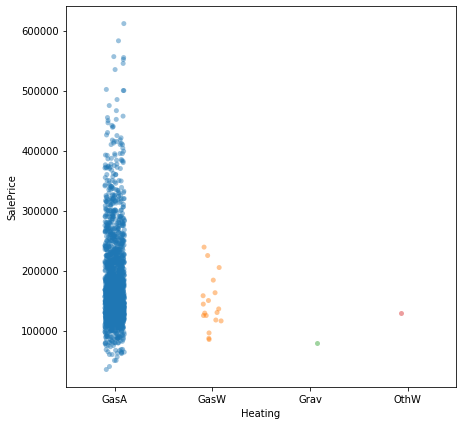

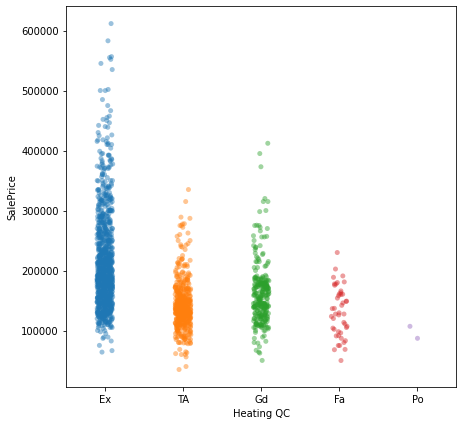

In [49]:
for i in categorical_columns:
    stripplot(i)

 **Columns I want to use**
- ['Heating QC', 'Kitchen Qual', 'Exter Qual', 'MS Zoning', 'Bsmt Qual', 'Central Air']

In [50]:
cat_col = ['Heating QC', 'Kitchen Qual', 'Exter Qual', 'MS Zoning', 'Bsmt Qual', 'Central Air', 'School']
train_dummies = pd.get_dummies(data = train[cat_col])
test_dummies = pd.get_dummies(data = test[cat_col])
train_dummies


Heating QC_Ex  Heating QC_Fa  Heating QC_Gd  Heating QC_Po  \
Id                                                                 
109               1              0              0              0   
544               1              0              0              0   
153               0              0              0              0   
318               0              0              1              0   
255               0              0              0              0   
...             ...            ...            ...            ...   
1587              1              0              0              0   
785               1              0              0              0   
916               0              0              1              0   
639               0              0              0              0   
10                0              0              1              0   

      Heating QC_TA  Kitchen Qual_Ex  Kitchen Qual_Fa  Kitchen Qual_Gd  \
Id                                                                       
109               0                0                0                1   
544               0                0                0                1   
153               1                0                0                1   
318               0                0                0                0   
255               1                0                0                0   
...             ...              ...              ...              ...   
1587              0                0                0                1   
785               0                0                0                0   
916               0                0                0                0   
639               1                0                0                0   
10                0                0                0                1   

      Kitchen Qual_TA  Exter Qual_Ex  Exter Qual_Fa  Exter Qual_Gd  \
Id                                                                   
109                 0              0              0              1   
544                 0              0              0              1   
153                 0              0              0              0   
318                 1              0              0              0   
255                 1              0              0              0   
...               ...            ...            ...            ...   
1587                0              0              0              1   
785                 1              0              0              0   
916                 1              0              0              0   
639                 1              0              0              0   
10                  0              0              0              0   

      Exter Qual_TA  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_RH  \
Id                                                                   
109               0                  0             0             0   
544               0                  0             0             0   
153               1                  0             0             0   
318               1                  0             0             0   
255               1                  0             0             0   
...             ...                ...           ...           ...   
1587              0                  0             0             0   
785               1                  0             0             0   
916               1                  0             0             0   
639               1                  0             0             0   
10                1                  0             0             0   

      MS Zoning_RL  MS Zoning_RM  Bsmt Qual_Ex  Bsmt Qual_Fa  Bsmt Qual_Gd  \
Id                                                                           
109              1             0             0             0             0   
544              1             0             0             0             1   
153              1      

In [51]:
## Lets make sure that there are no columns in either sets that are missing from the other
mftest = list(set(train_dummies) - set(test_dummies))
mftrain = list(set(test_dummies) - set(train_dummies))
print(mftest)
print(mftrain)

['Heating QC_Po']
['Kitchen Qual_Po', 'MS Zoning_I (all)']


In [52]:
for i in mftest:
    test_dummies[i] = 0
    
for i in mftrain:
    train_dummies[i] = 0
    
print(train_dummies.shape)
print(test_dummies.shape)

(1799, 34)
(878, 34)


### Make a df comprised of the X_poly_df as well as the dummies we just made
<span id='test3'>

In [53]:
X_3 = X_poly_df.join(train_dummies)
Kagg_3 = kagg_poly_df.join(test_dummies)
y = train['SalePrice']

In [54]:
print(X_3.shape)
print(Kagg_3.shape)

(1799, 384)
(878, 384)


In [55]:
# Lets do a quick check of expected scores
ridge_it(X_3)

Train Score: 0.9378711570137969
Test Score: 0.9252317917842788

 Train RMSE: 18390.388282997934
Train RMSE: 22289.89318313327


> its slightly better, but the variance seems to be a bit higher here. But let's see if its good enough

In [56]:
# Lets standardize it first
sc = StandardScaler()
Z_3 = sc.fit_transform(X_3)
Zagg_3 = sc.fit_transform(Kagg_3)

ridge_3 = RidgeCV(alphas = np.logspace(0,3,150), cv = 5)
ridge_3.fit(Z_3, y)

print(ridge_3.score(Z_3, y))
print(metrics.mean_squared_error(y, ridge_3.predict(Z_3), squared = False))

0.9386702640153908
18769.98351520743


In [57]:
# Lets see the test set now
Kagg_3['SalePrice']  = ridge_3.predict(Zagg_3)
output_3 = Kagg_3[['SalePrice']]
output_3

SalePrice
Id                 
2658  175743.954327
2718  167944.698651
2414  208801.447976
1989  125901.893299
625   173631.640266
...             ...
1662  200688.851980
1234  208778.025622
1373  131630.443136
1672  122055.459727
1939  123803.169515

[878 rows x 1 columns]

## This test 3 was probably one of the worst ones we've had so far
``` python
output_3.to_csv('../datasets/Sub8.csv') # should be under submission 7 on kaggled, accidentally wrote over it as 7 before
```

**RMSE:**  26,292.933 <span id='test3_score'>

In [58]:
Kagg_3.drop('SalePrice', axis = 1, inplace = True)

## This will be the last test, just to confirm something for the problem statement <span id ='test4'>

### We will do one with the neighborhood and schools to see if this increases the score

#### Lets just make dummies of the neightborhoods and join it to the X_mix and Kagg_mix because they already contain school

In [59]:
# Lets drop the coef column we made for the stats model first
X_mix.drop('Coef',axis = 1, inplace = True)

In [60]:
train_neigh = pd.get_dummies(data = train['Neighborhood']).drop('Landmrk',axis = 1)
test_neigh = pd.get_dummies(data = test['Neighborhood'])

In [61]:
mftrain = set(test_neigh) - set(train_neigh)
mftest = set(train_neigh) - set(test_neigh)

print(mftrain)
print(mftest)

set()
{'GrnHill'}


In [62]:
# Lets only add GrnHill because I want to use the Landmrk as the dummy drop column anyways
test_neigh['GrnHill'] = 0

In [63]:
# Now lets go ahead and combine this with the _mix df
X_mix2 = X_mix.join(train_neigh)
Kagg_mix2 = Kagg_mix.join(test_neigh)

print(X_mix2.shape)
print(Kagg_mix2.shape)

(1799, 383)
(878, 383)


In [64]:
ridge_it(X_mix2)

Train Score: 0.9364976689878195
Test Score: 0.9120283827916891

 Train RMSE: 18339.387673578265
Train RMSE: 24961.00895350715


In [65]:
# Lets standardize it first
sc_4 = StandardScaler()
Z_mix2 = sc_4.fit_transform(X_mix2)
Zagg_mix2 = sc_4.fit_transform(Kagg_mix2)

ridge_4 = RidgeCV(alphas = np.logspace(0,2,100), cv = 5)
ridge_4.fit(Z_mix2, y)

print(ridge_4.score(Z_mix2, y))
print(metrics.mean_squared_error(y, ridge_4.predict(Z_mix2), squared = False))

0.9382463830356724
18834.73627155505


In [66]:
Kagg_mix2['SalePrice'] = ridge_4.predict(Zagg_mix2)
output_4 = Kagg_mix2[['SalePrice']]
output_4

SalePrice
Id                 
2658  160410.395190
2718  162035.642898
2414  201938.895822
1989  125370.606746
625   179144.657797
...             ...
1662  211441.165807
1234  214347.536016
1373  132823.684187
1672  124324.225866
1939  122588.200666

[878 rows x 1 columns]

``` python
output_4.to_csv('../datasets/Sub9.csv')
```

**RMSE Score:** *23,375.032*  <span id='test4_score'>

In [67]:
Kagg_mix2.drop('SalePrice', axis = 1, inplace = True)

## Lets export somethings in order to have an analysis of it in the 3rd notebook 
##### Lets just take the 3 best scores from our test in this note book
<span id ='exports'>

In [68]:
# Best model Score for X
X_mix.to_csv('../datasets/Exported/1_x_df.csv')

# 2nd Best model Score for X
X_poly_df.to_csv('../datasets/Exported/2_x_df.csv')
kagg_poly_df.to_csv('../datasets/Exported/2_kagg_df.csv')
# 3rd Best model Score for X
X_mix2.to_csv('../datasets/Exported/3_x_df.csv', )

# cleaned train dataframe
train.to_csv('../datasets/Exported/cleaned_train.csv')
test.to_csv('../datasets/Exported/cleaned_test.csv')